# CREDENTIAL RISK ASSESSMENT

## LOADING DEPENDENCY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency

## LOADING FILES AND EXPLORATION

In [ ]:
credit_data = pd.read_csv("credit_risk_dataset_v.csv", sep=',', header=0, on_bad_lines='skip')

In [ ]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Pre Processing

In [ ]:
credit_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Total number of rows in the dataset
total_rows = credit_data.shape[0]

# Calculate the count of missing values in each column
missing_count = credit_data.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_count / total_rows) * 100

# Combine both count and percentage into a single DataFrame for better presentation
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

# Display the missing data
print("Missing values (count and percentage) in each column:\n", missing_data)


Missing values (count and percentage) in each column:
                             Missing Count  Missing Percentage (%)
person_age                              0                0.000000
person_income                           0                0.000000
person_home_ownership                   0                0.000000
person_emp_length                     895                2.747000
loan_intent                             0                0.000000
loan_grade                              0                0.000000
loan_amnt                               0                0.000000
loan_int_rate                        3116                9.563856
loan_status                             0                0.000000
loan_percent_income                     0                0.000000
cb_person_default_on_file               0                0.000000
cb_person_cred_hist_length              0                0.000000


In [ ]:
# Get summary statistics for numerical columns
print(credit_data.describe())


         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [ ]:
import pandas as pd

# Load the dataset
credit_data = pd.read_csv("credit_risk_dataset_v.csv", sep=',', header=0)

# Check for missing values before imputation
print("Missing values before imputation:\n", credit_data.isnull().sum())

# Impute missing values for loan_int_rate (using mean)
mean_loan_int_rate = credit_data['loan_int_rate'].mean()
credit_data['loan_int_rate'].fillna(mean_loan_int_rate, inplace=True)

# Impute missing values for person_emp_length (using median)
median_emp_length = credit_data['person_emp_length'].median()
credit_data['person_emp_length'].fillna(median_emp_length, inplace=True)

# Check for missing values after imputation
print("\nMissing values after imputation:\n", credit_data.isnull().sum())

# Display the first few rows of the updated DataFrame
print("\nUpdated DataFrame:\n", credit_data.head())


Missing values before imputation:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Missing values after imputation:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Updated DataFrame:
    person_age  person_income person_home_ownership  person_emp_length  \
0     

In [ ]:
missing_values = credit_data.isnull().sum()
print(missing_values)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
print(credit_data.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       32581.000000  32581.000000   
mean      27.734600   6.607485e+04           4.767994   9589.371106   
std        6.348078   6.198312e+04           4.087372   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32581.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.081605      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%   

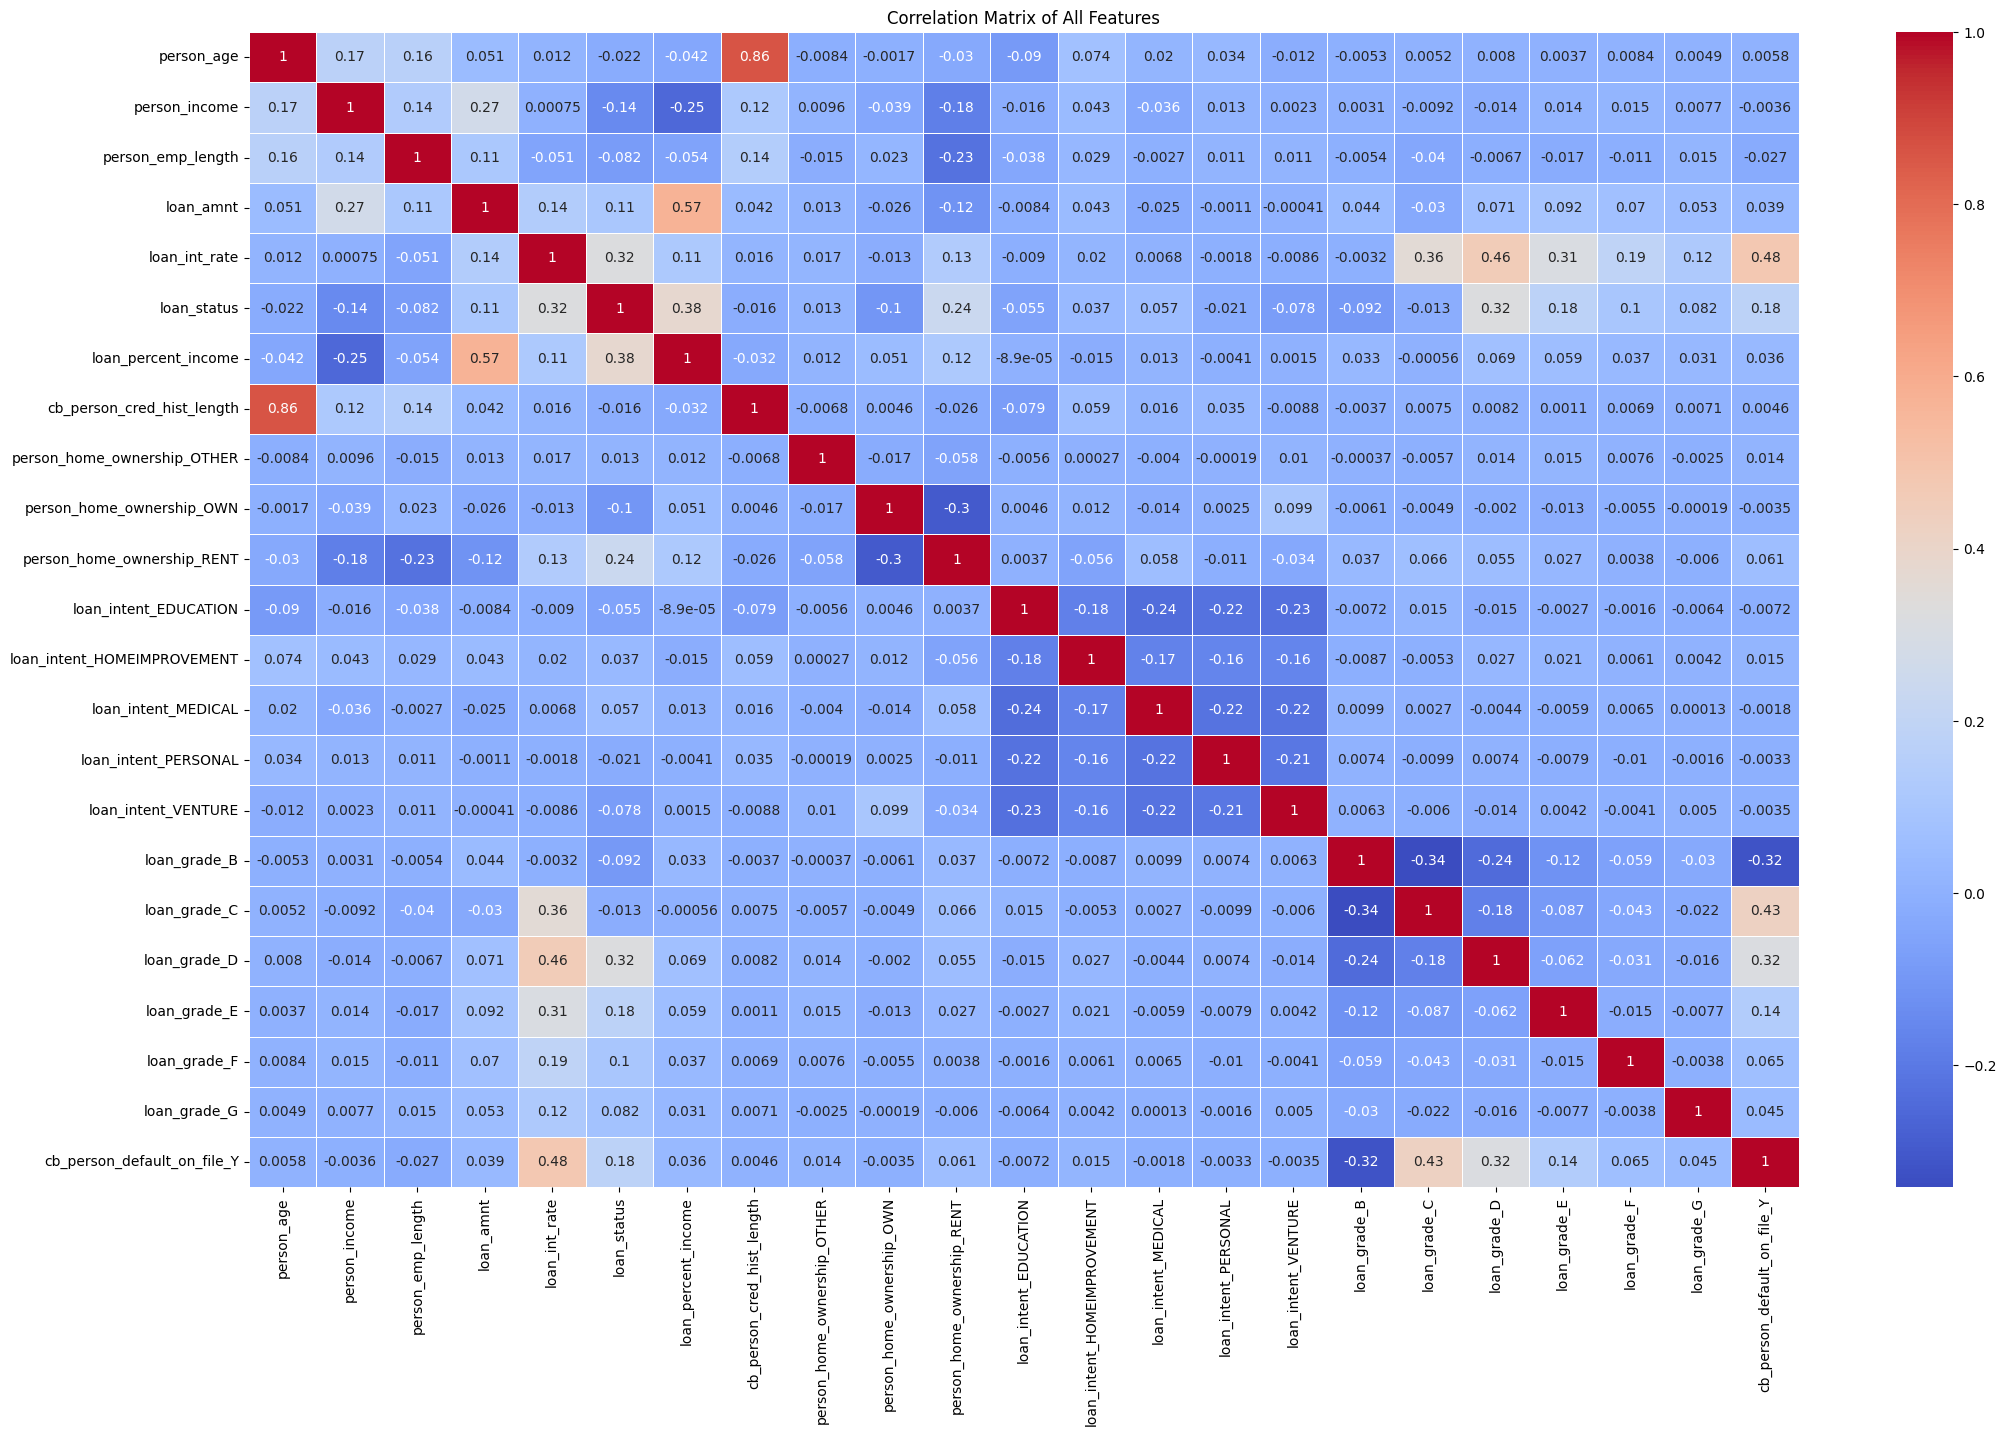

In [ ]:
credit_data_encoded = pd.get_dummies(credit_data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)

correlation_matrix = credit_data_encoded.corr()

plt.figure(figsize=(25,15))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of All Features')
plt.show()

In [ ]:
credit_data_encoded

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,False,False,...,False,True,False,True,False,False,False,False,False,False


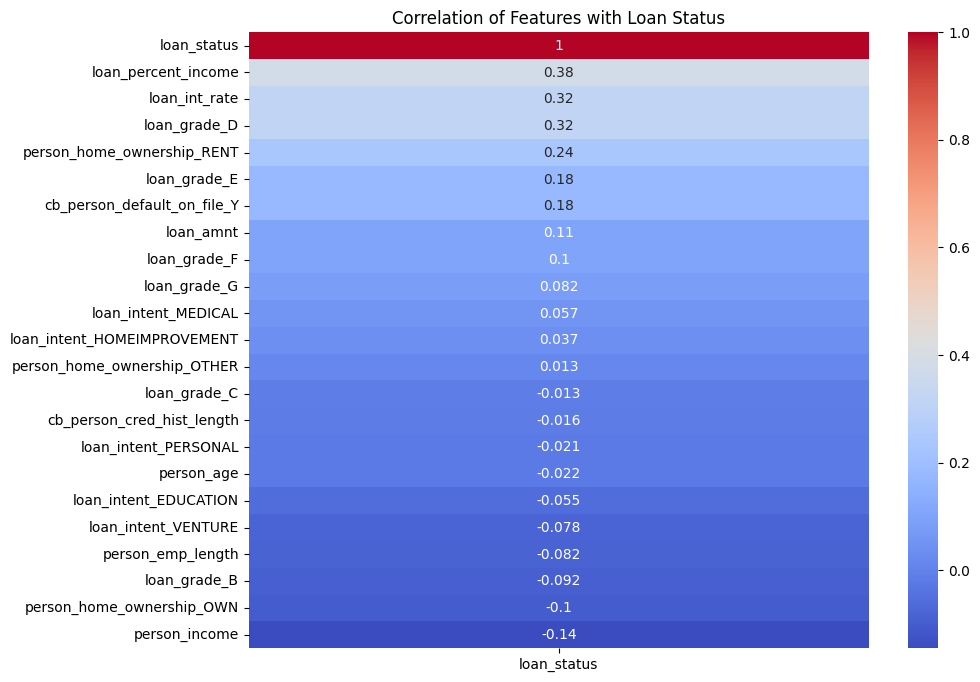

In [ ]:
credit_data_encoded = pd.get_dummies(credit_data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)

correlation_matrix = credit_data_encoded.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix[['loan_status']].sort_values(by='loan_status', ascending=False), annot=True, cmap='coolwarm')

plt.title('Correlation of Features with Loan Status')
plt.show()

In [ ]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


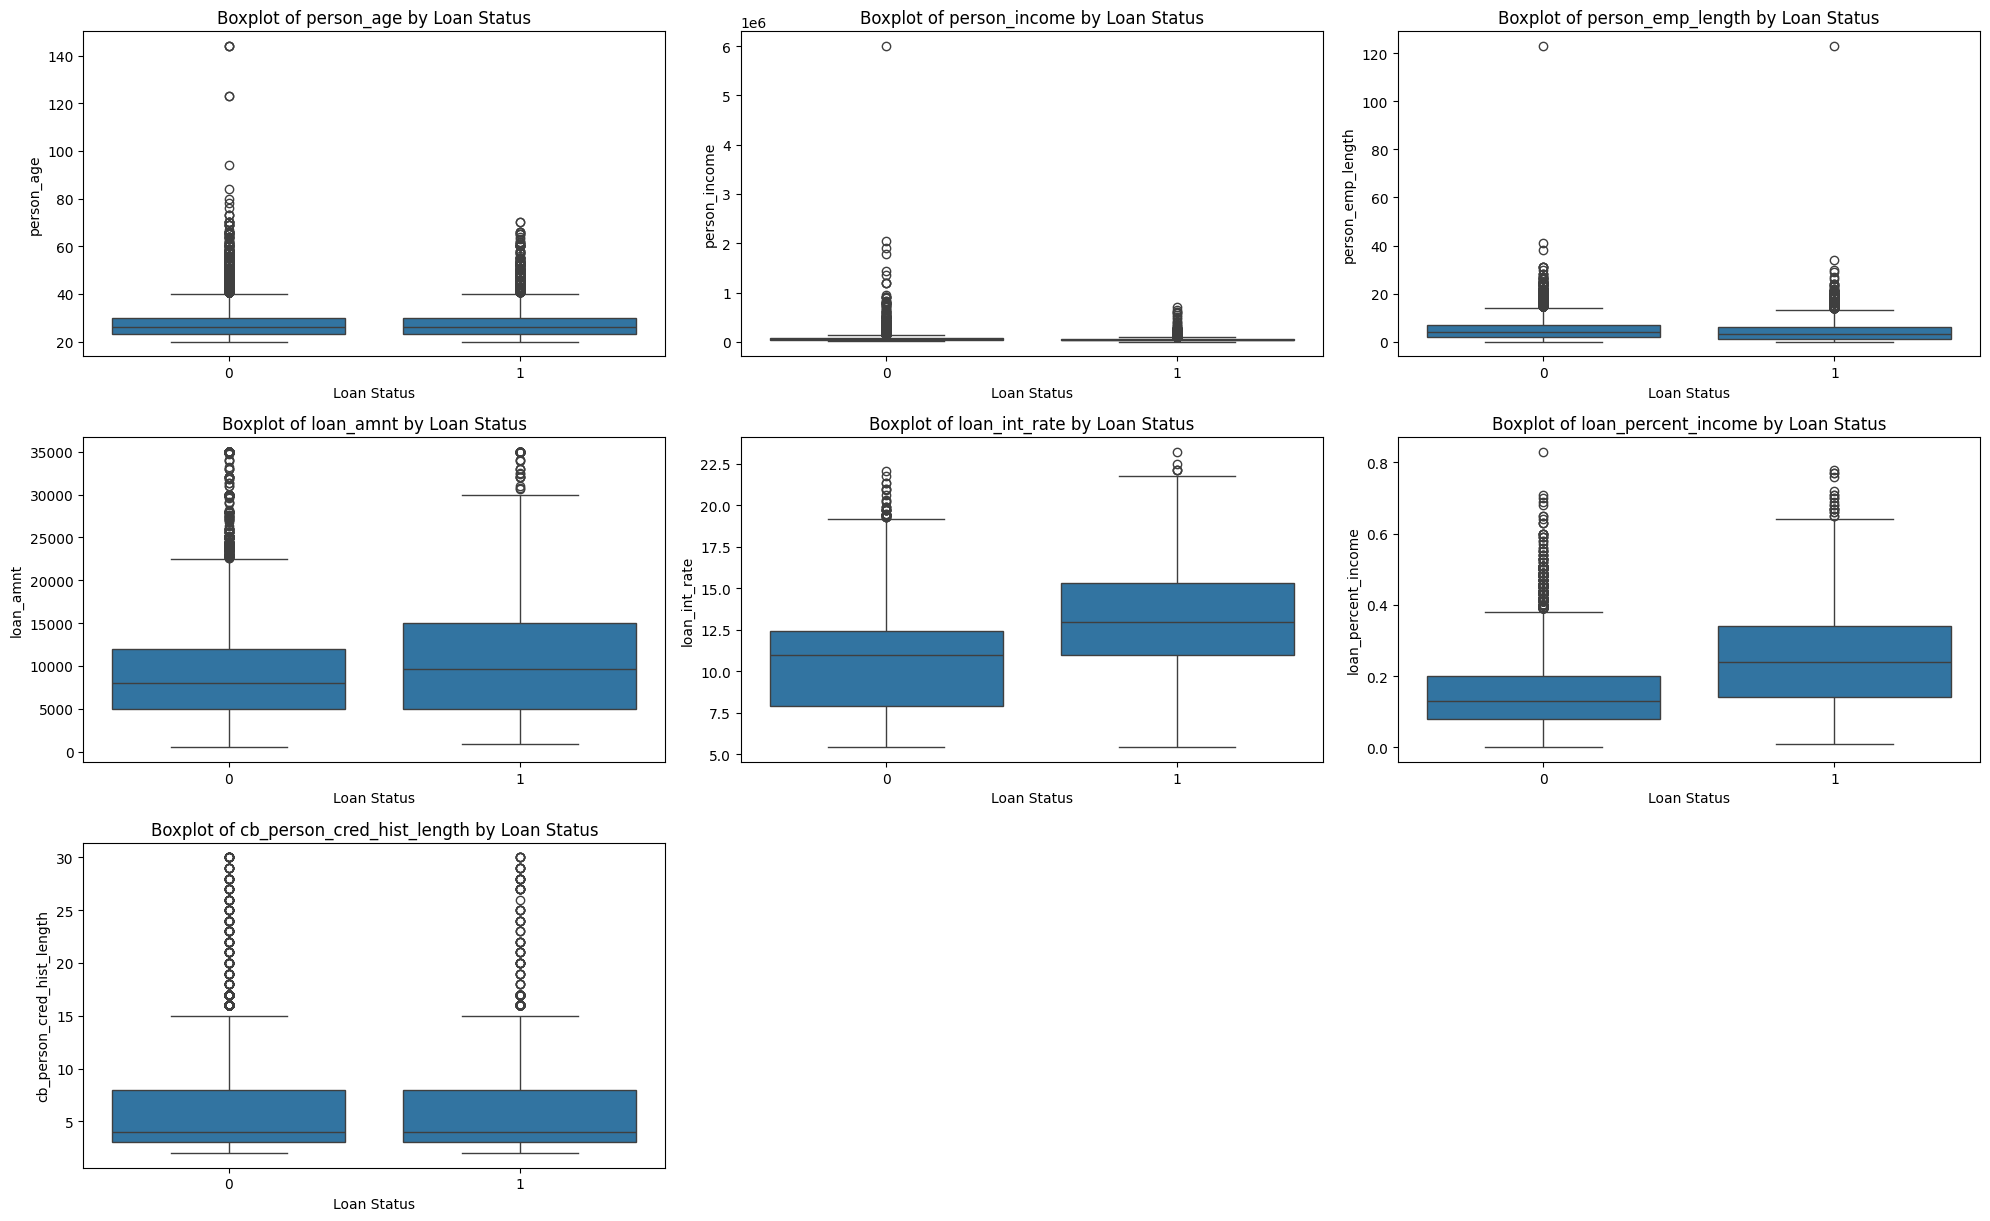

In [ ]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']

plt.figure(figsize=(20,20))

for i, column in enumerate(columns, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size if needed
    sns.boxplot(x='loan_status', y=column, data=credit_data)
    plt.title(f'Boxplot of {column} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
def remove_rows_based_on_iqr(df, include_cols, iqr_threshold):
    df_cleaned = df.copy()

    for col in include_cols:
        if col in df_cleaned.columns and df_cleaned[col].dtype in ['int64', 'float64']:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - iqr_threshold * IQR
            upper_bound = Q3 + iqr_threshold * IQR

            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned


include_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_percent_income']
credit_df_cleaned = remove_rows_based_on_iqr(credit_data, include_cols=include_columns, iqr_threshold=2.5)
credit_df_cleaned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
32294,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13
32295,42,101000,MORTGAGE,6.0,DEBTCONSOLIDATION,F,25000,16.15,1,0.25,Y,14


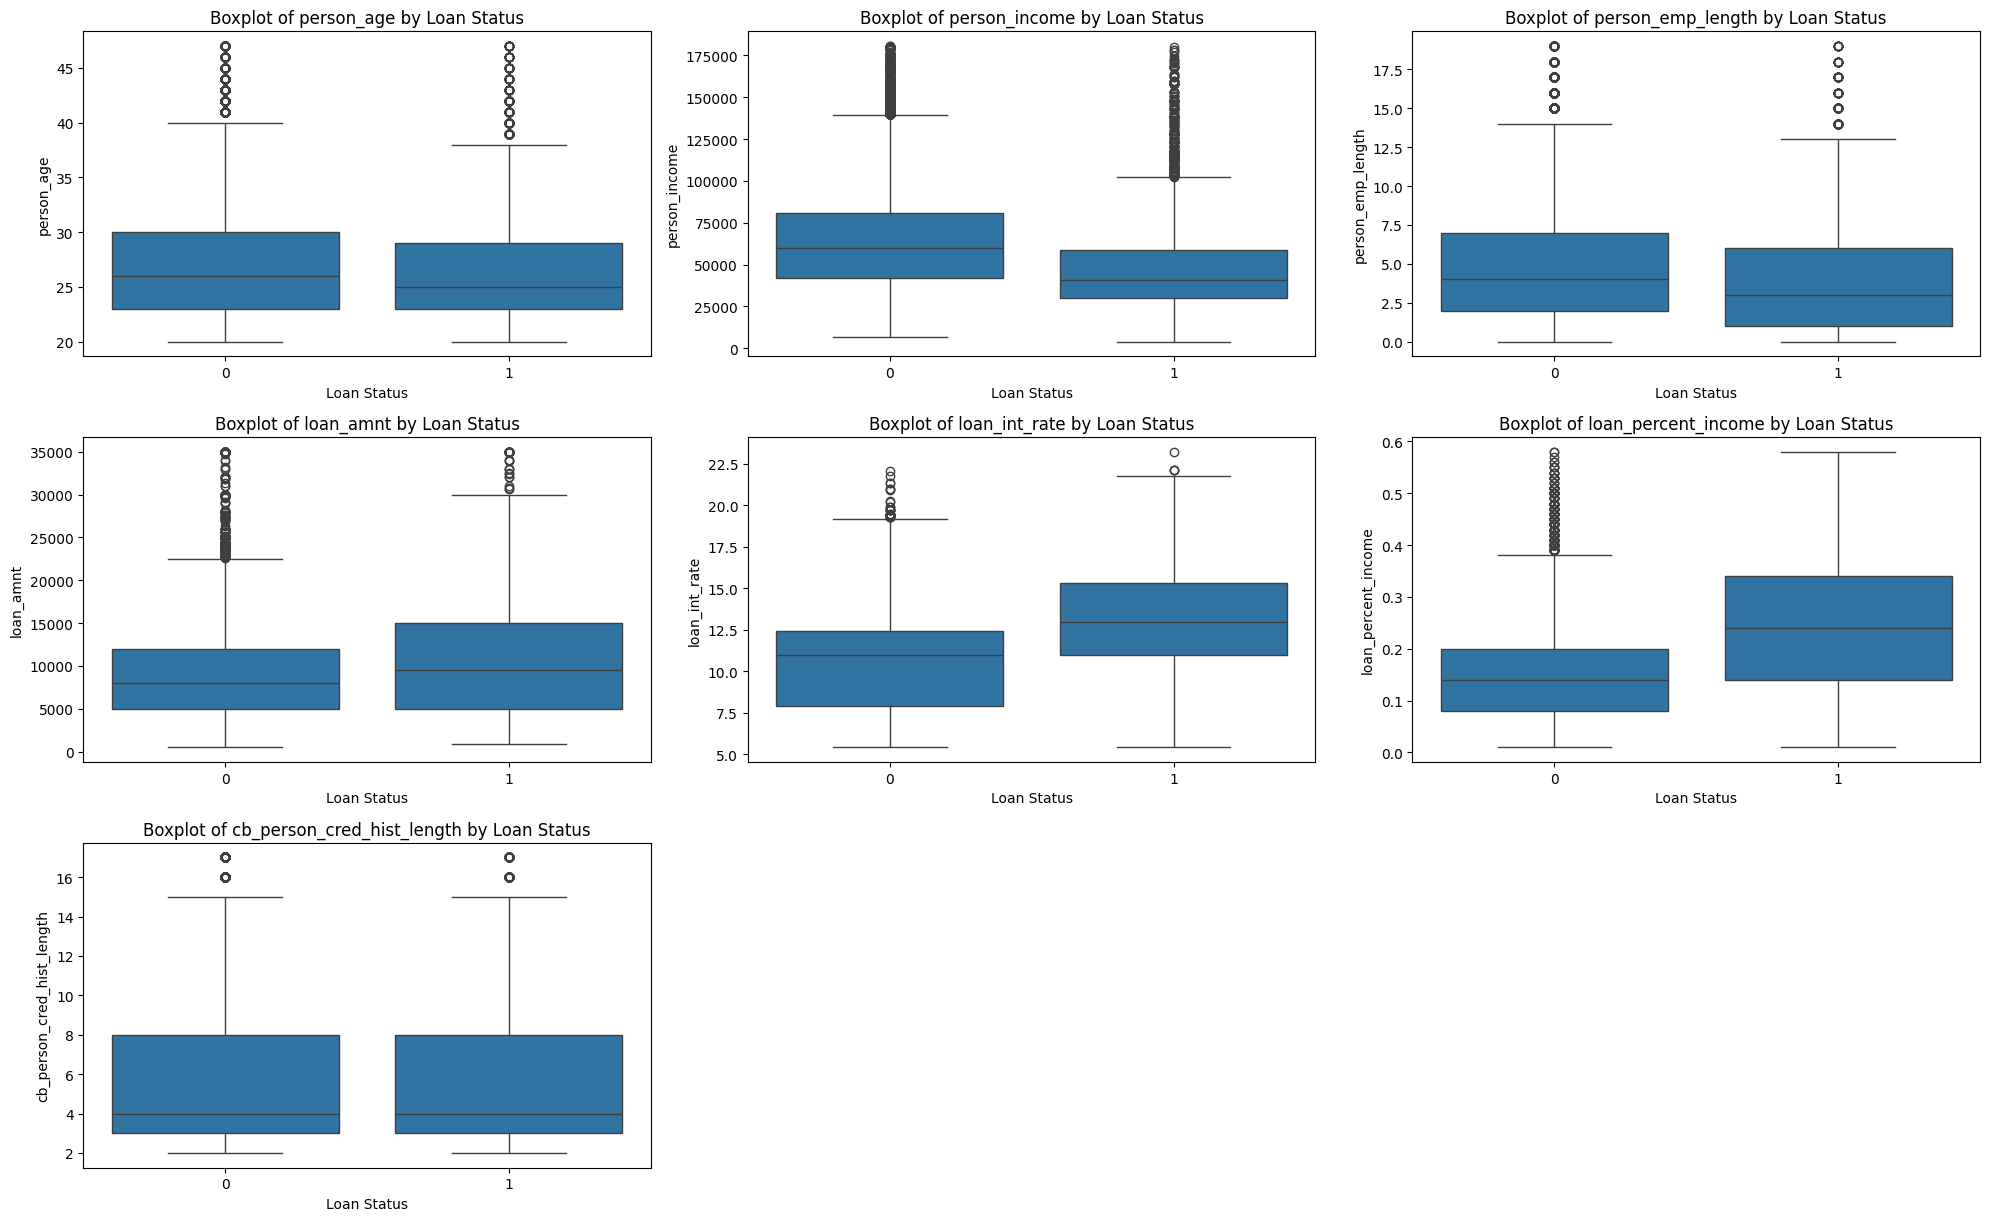

In [ ]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']

plt.figure(figsize=(20,20))

for i, column in enumerate(columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='loan_status', y=column, data=credit_df_cleaned)
    plt.title(f'Boxplot of {column} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

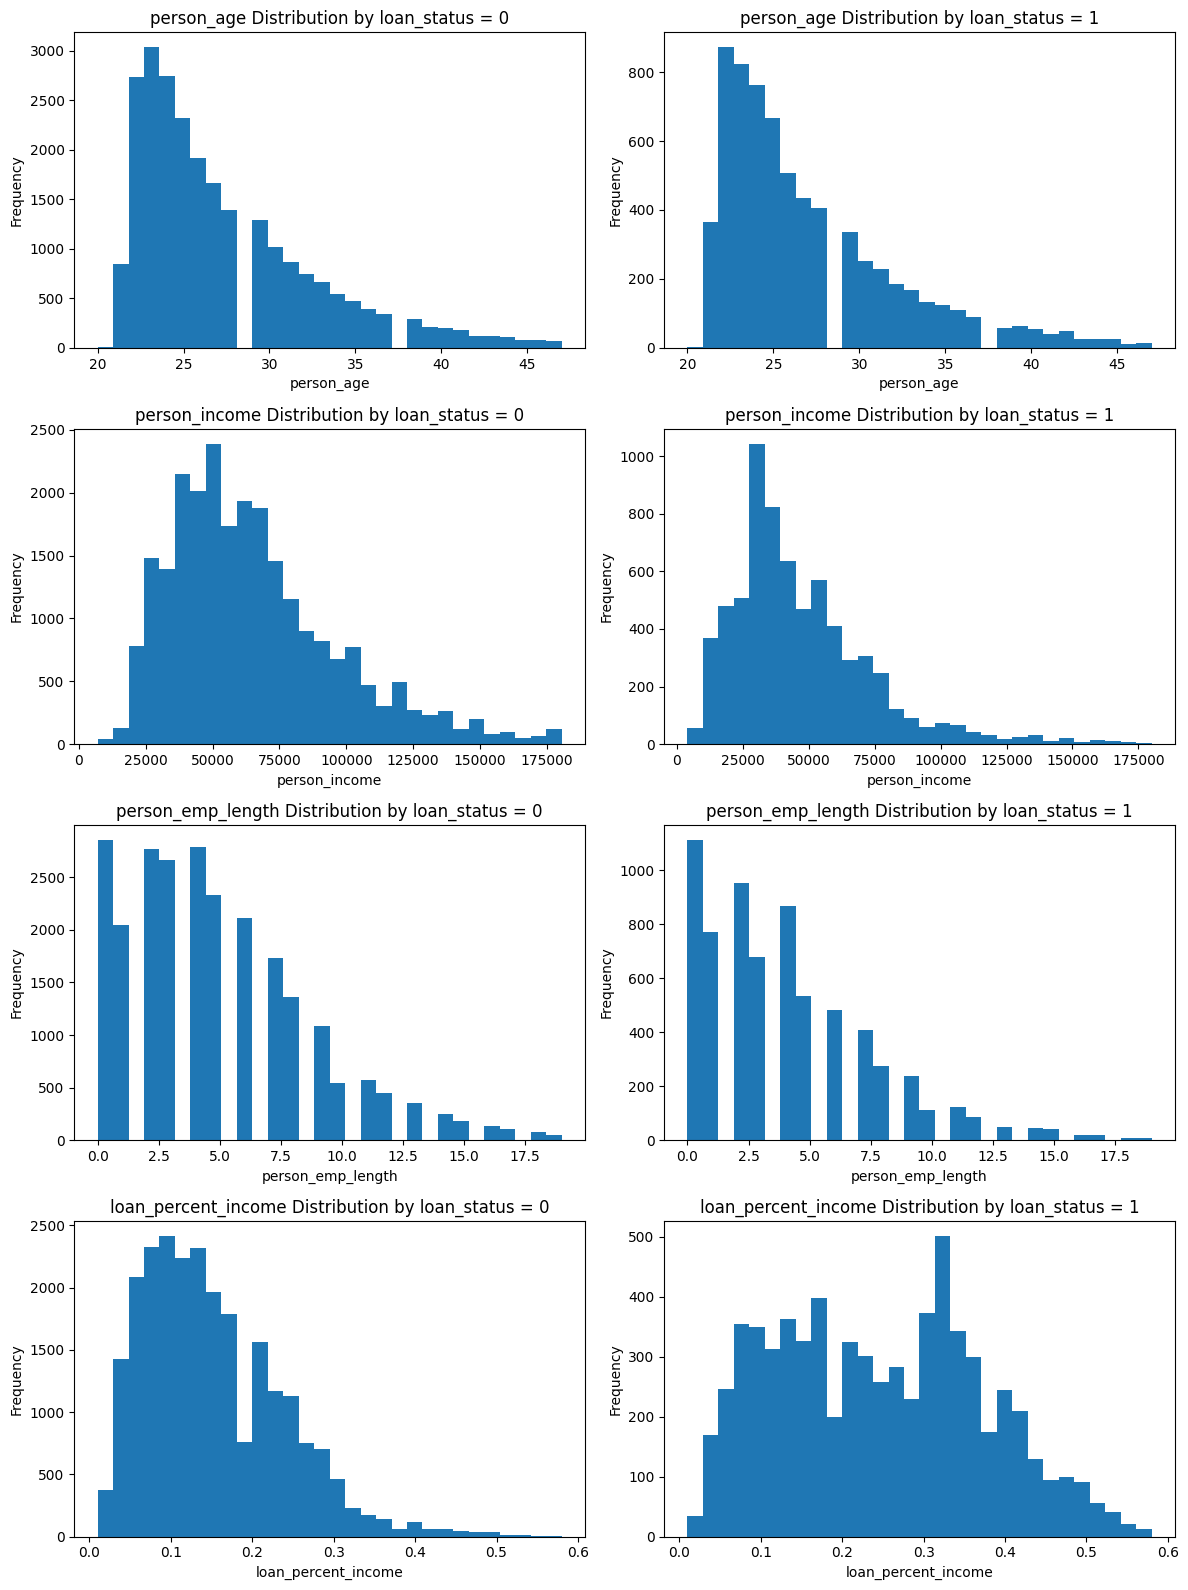

In [ ]:
def plot_histograms(df, target_col, feature_cols):
    num_features = len(feature_cols)

    # Create a subplot for each feature
    fig, axes = plt.subplots(num_features, 2, figsize=(12, num_features * 4))

    if num_features == 1:
        axes = [axes]  # Ensure axes is always iterable

    for i, col in enumerate(feature_cols):
        # Plot histogram for target == 0
        df[df[target_col] == 0][col].plot(kind='hist', ax=axes[i][0], title=f'{col} Distribution by {target_col} = 0', bins=30)
        axes[i][0].set_xlabel(col)

        # Plot histogram for target == 1
        df[df[target_col] == 1][col].plot(kind='hist', ax=axes[i][1], title=f'{col} Distribution by {target_col} = 1', bins=30)
        axes[i][1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Example usage
include_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_percent_income']
plot_histograms(credit_df_cleaned, 'loan_status', include_columns)

In [ ]:
def apply_log_transformation(df, include_cols):
    df_transformed = df.copy()

    for col in include_cols:
        if col in df_transformed.columns and df_transformed[col].dtype in ['int64', 'float64']:
            df_transformed[col] = df_transformed[col].apply(lambda x: np.log(x) if x > 0 else np.nan)

    return df_transformed

# Example usage
include_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_percent_income']
credit_df_transformed = apply_log_transformation(credit_data, include_cols=include_columns)
credit_df_transformed

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3.091042,10.985293,RENT,4.812184,PERSONAL,D,35000,16.02,1,-0.527633,Y,3
1,3.044522,9.169518,OWN,1.609438,EDUCATION,B,1000,11.14,0,-2.302585,N,2
2,3.218876,9.169518,MORTGAGE,0.000000,MEDICAL,C,5500,12.87,1,-0.562119,N,3
3,3.135494,11.089805,RENT,1.386294,MEDICAL,C,35000,15.23,1,-0.634878,N,2
4,3.178054,10.904119,RENT,2.079442,MEDICAL,C,35000,14.27,1,-0.597837,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.043051,10.878047,MORTGAGE,0.000000,PERSONAL,C,5800,13.16,0,-2.207275,N,30
32577,3.988984,11.695247,MORTGAGE,1.386294,PERSONAL,A,17625,7.49,0,-1.897120,N,19
32578,4.174387,11.238489,RENT,1.098612,HOMEIMPROVEMENT,B,35000,10.99,1,-0.776529,N,28
32579,4.025352,11.918391,MORTGAGE,1.609438,PERSONAL,B,15000,11.48,0,-2.302585,N,26


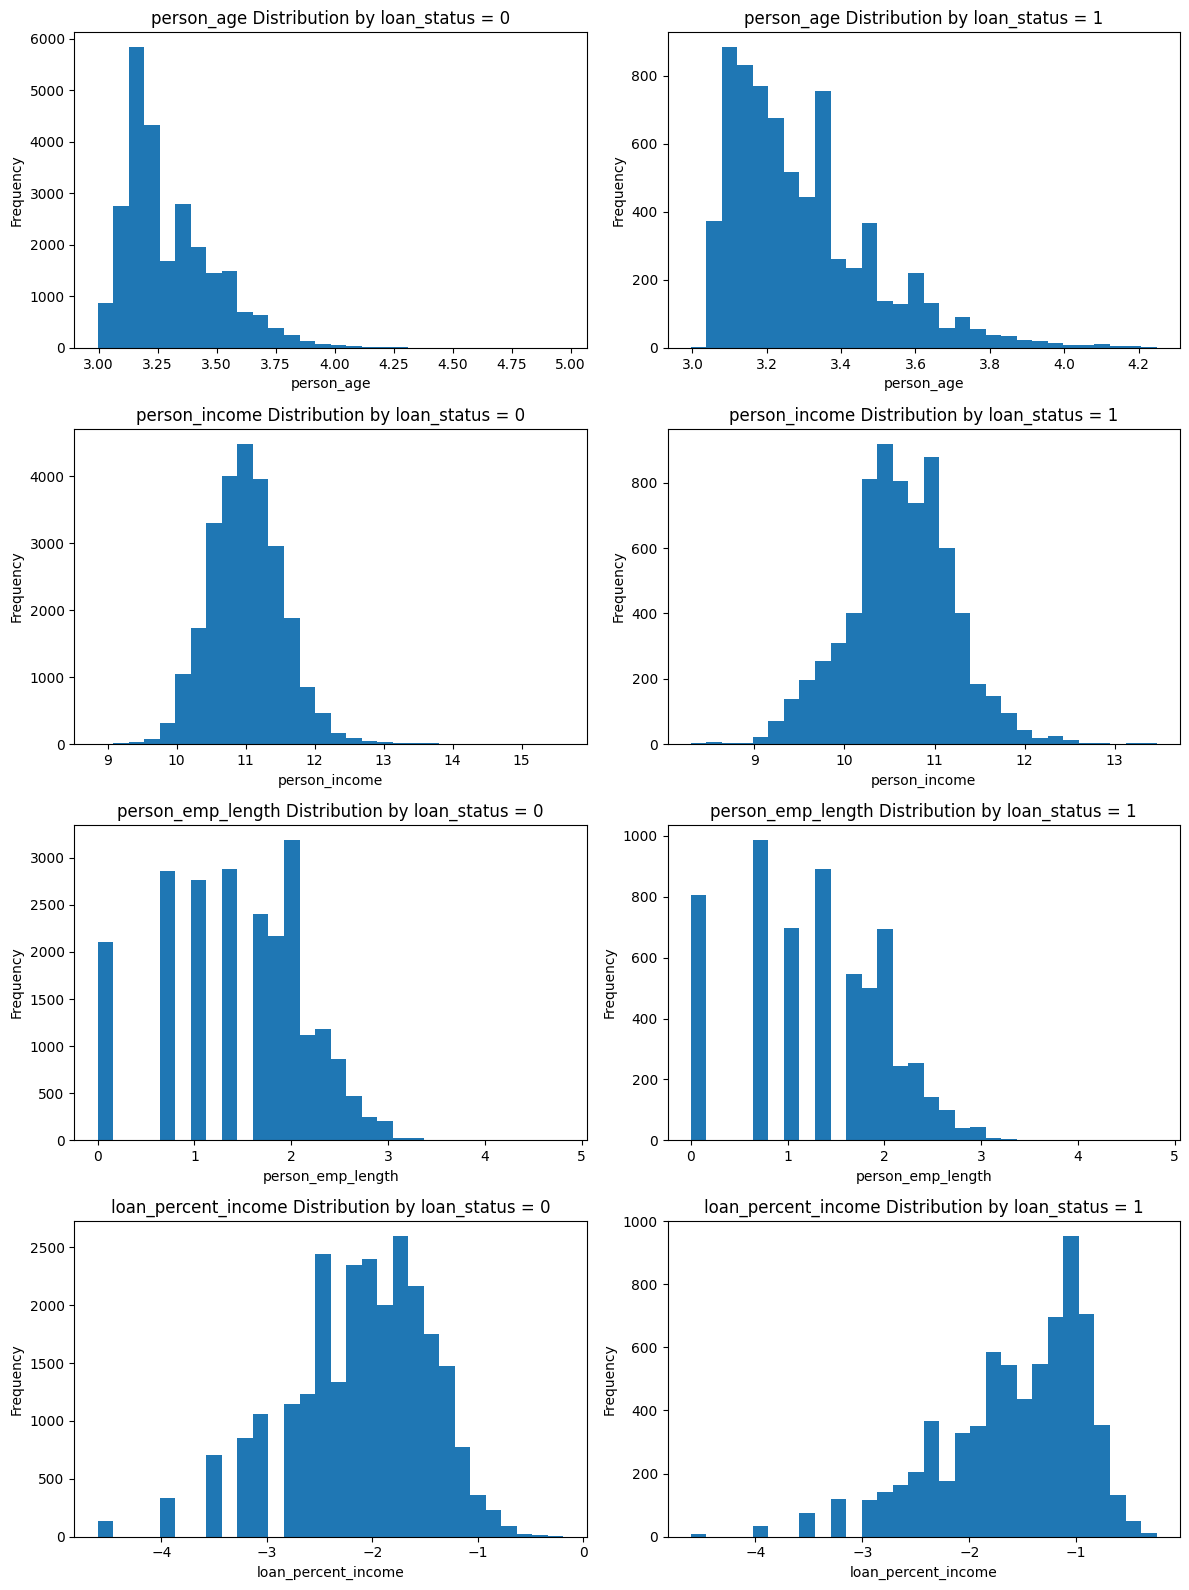

In [ ]:
def plot_histograms(df, target_col, feature_cols):
    num_features = len(feature_cols)

    # Create a subplot for each feature
    fig, axes = plt.subplots(num_features, 2, figsize=(12, num_features * 4))

    if num_features == 1:
        axes = [axes]  # Ensure axes is always iterable

    for i, col in enumerate(feature_cols):
        # Plot histogram for target == 0
        df[df[target_col] == 0][col].plot(kind='hist', ax=axes[i][0], title=f'{col} Distribution by {target_col} = 0', bins=30)
        axes[i][0].set_xlabel(col)

        # Plot histogram for target == 1
        df[df[target_col] == 1][col].plot(kind='hist', ax=axes[i][1], title=f'{col} Distribution by {target_col} = 1', bins=30)
        axes[i][1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Example usage
include_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_percent_income']
plot_histograms(credit_df_transformed, 'loan_status', include_columns)

In [ ]:
credit_df_cleaned.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## TESTING SOME HYPOTHESIS FOR EDA

![image.png](attachment:874736ba-0a1d-4e79-91d9-b77732933e81.png)

In [ ]:
credit_df_cleaned.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
len(credit_df_cleaned[credit_df_cleaned['loan_status'] == 1]),len(credit_df_cleaned[credit_df_cleaned['loan_status'] == 0])

(6835, 24448)

### HYPOTHESIS FORMULATION AND STUDY

#### Hypothesis 1: Older applicants are less likely to default on their loans compared to younger applicants


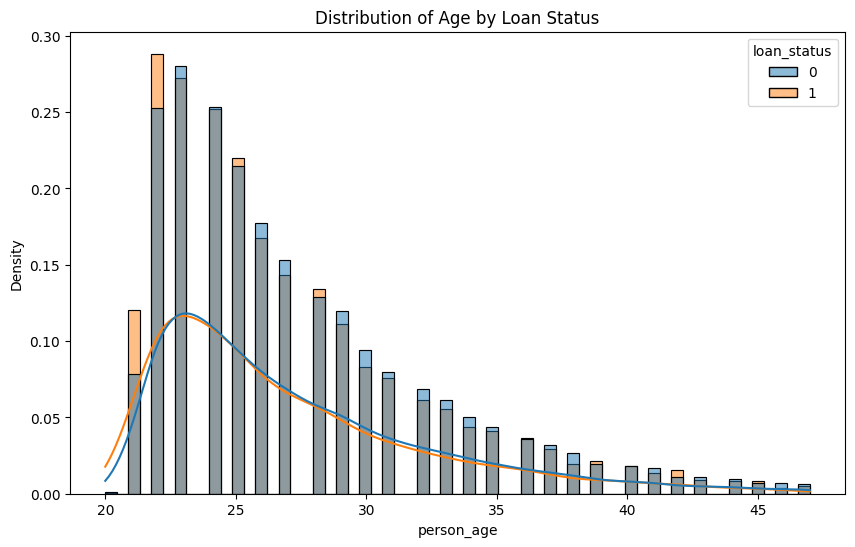

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_df_cleaned, x='person_age', hue='loan_status', kde=True, stat="density", common_norm=False)
plt.title('Distribution of Age by Loan Status')
plt.show()

In [ ]:
contingency_table = pd.crosstab(credit_df_cleaned['person_age'], credit_df_cleaned['loan_status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is a statistically significant relationship between Age and loan default status.")
else:
    print("There is no statistically significant relationship between Age and loan default status.")

Chi-square statistic: 92.40205231524797
P-value: 4.392928118425348e-09
Degrees of freedom: 27
There is a statistically significant relationship between Age and loan default status.


Interpretation of Hypothesis:
This graph supports the hypothesis that younger borrowers are more likely to default on their loans compared to older borrowers. The density of defaults (orange) is notably higher for younger individuals, particularly around age 20. As borrowers age, the likelihood of default decreases, as indicated by the shrinking orange areas and the increasing density of non-defaults.

#### Hypothesis 2: Applicants who own their homes are less likely to default on their loans


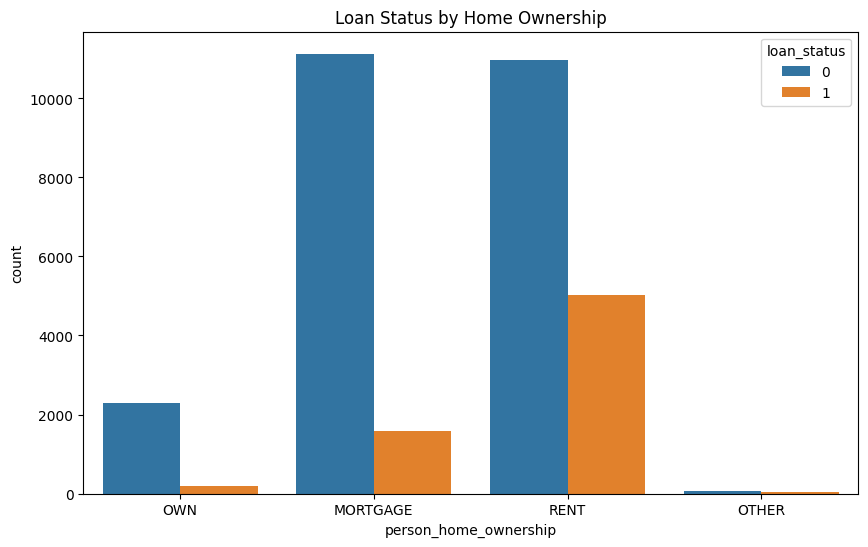

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_df_cleaned, x='person_home_ownership', hue='loan_status')
plt.title('Loan Status by Home Ownership')
plt.show()

In [ ]:
proportions = credit_df_cleaned.groupby('person_home_ownership')['loan_status'].mean()
proportions

,loan_status
person_home_ownership,
MORTGAGE,0.125138
OTHER,0.330000
OWN,0.073279
RENT,0.314489


In [ ]:
contingency_table = pd.crosstab(credit_df_cleaned['person_home_ownership'], credit_df_cleaned['loan_status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is a statistically significant relationship between home ownership and loan default status.")
else:
    print("There is no statistically significant relationship between home ownership and loan default status.")

Chi-square statistic: 1824.6701436958006
P-value: 0.0
Degrees of freedom: 3
There is a statistically significant relationship between home ownership and loan default status.


#### Hypothesis 3: Borrowers with longer employment lengths are less likely to default on their loans


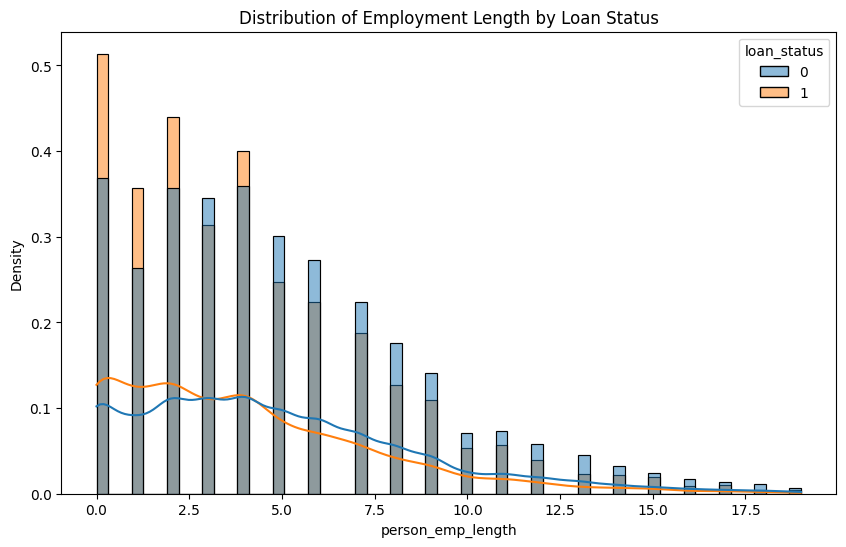

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_df_cleaned, x='person_emp_length', hue='loan_status', kde=True, stat="density", common_norm=False)
plt.title('Distribution of Employment Length by Loan Status')
plt.show()

In [ ]:
contingency_table = pd.crosstab(credit_df_cleaned['person_emp_length'], credit_df_cleaned['loan_status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is a statistically significant relationship between employement and loan default status.")
else:
    print("There is no statistically significant relationship between employement and loan default status.")

Chi-square statistic: 336.16565158598803
P-value: 7.333069221985364e-60
Degrees of freedom: 19
There is a statistically significant relationship between employement and loan default status.


#### Hypothesis 4: The intent of the loan affects the likelihood of default

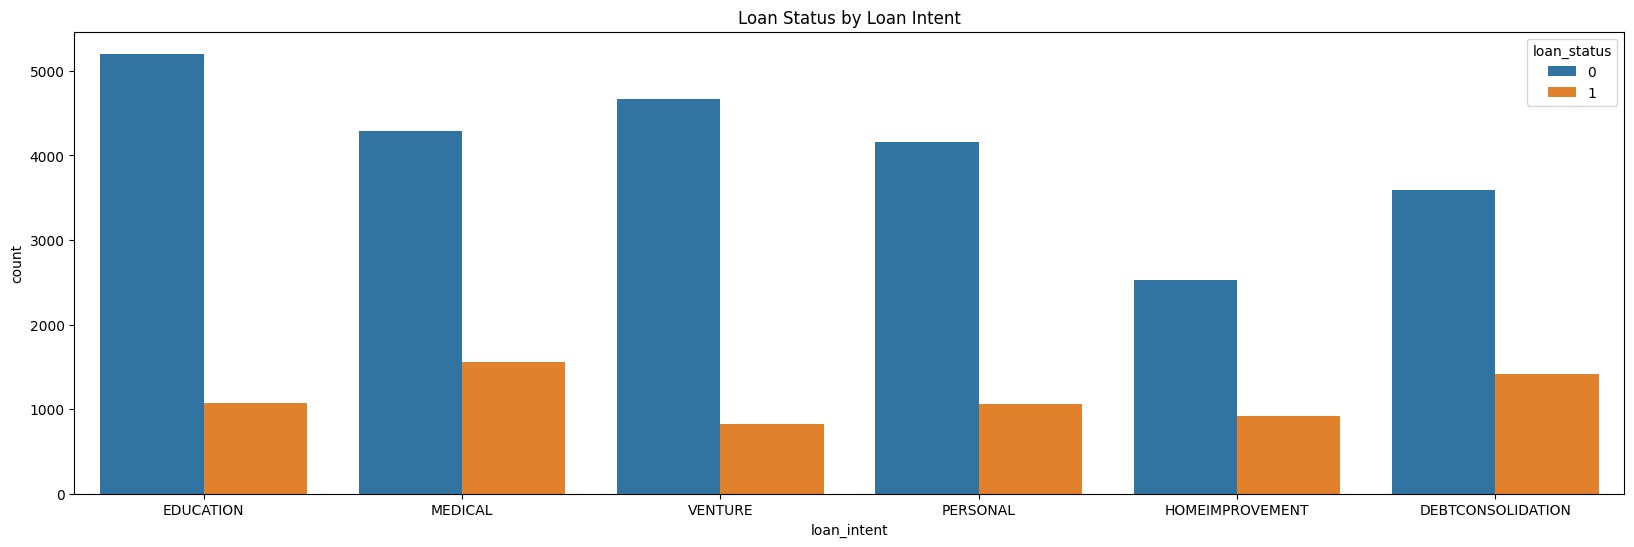

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=credit_df_cleaned, x='loan_intent', hue='loan_status')
plt.title('Loan Status by Loan Intent')
plt.show()

In [ ]:
contingency_table = pd.crosstab(credit_df_cleaned['loan_intent'], credit_df_cleaned['loan_status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is a statistically significant relationship between Loan Intent and loan default status.")
else:
    print("There is no statistically significant relationship between Loan Intent and loan default status.")

Chi-square statistic: 486.80605484766016
P-value: 5.622567865364977e-103
Degrees of freedom: 5
There is a statistically significant relationship between Loan Intent and loan default status.


In [ ]:
credit_df_cleaned.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

#### Hypothesis 5: The personal income wealth affects your chances of getting a loan?

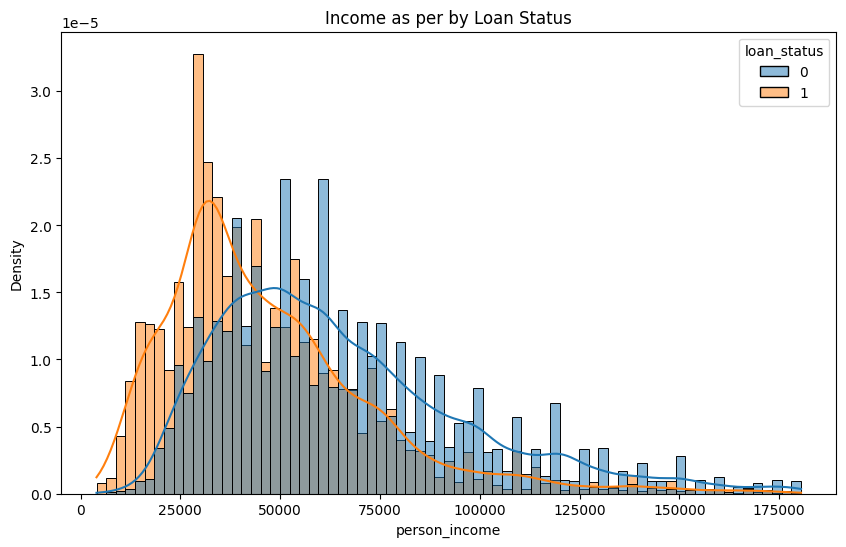

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_df_cleaned, x='person_income', hue='loan_status', kde=True, stat="density", common_norm=False)
plt.title('Income as per by Loan Status')
plt.show()

In [ ]:
contingency_table = pd.crosstab(credit_df_cleaned['person_income'], credit_df_cleaned['loan_status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is a statistically significant relationship between Personal Income and loan default status.")
else:
    print("There is no statistically significant relationship between Personal Income and loan default status.")

Chi-square statistic: 11300.320820647594
P-value: 0.0
Degrees of freedom: 4029
There is a statistically significant relationship between Personal Income and loan default status.


#### MODEL SELECTION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency

# Step 1: Load and check the dataset
credit_df_cleaned = pd.read_csv('credit_risk_dataset_v.csv')  # Replace with your actual file path

# Inspect the dataframe to ensure correct columns
print(credit_df_cleaned.head())

# Optional: Clean the data (e.g., drop missing values, encode categorical variables)
# For example, if 'loan_status' is categorical, map it to numeric values:
# credit_df_cleaned['loan_status'] = credit_df_cleaned['loan_status'].map({'default': 1, 'paid': 0})

# Step 2: Perform Chi-Square Test between Age and Loan Status
# Ensure 'person_age' is categorical or binned, if not, you can bin it
# Example: credit_df_cleaned['person_age'] = pd.cut(credit_df_cleaned['person_age'], bins=[20, 30, 40, 50, 60, 70])

contingency_table = pd.crosstab(credit_df_cleaned['person_age'], credit_df_cleaned['loan_status'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Determine if the relationship is statistically significant
if p < 0.05:
    print("There is a statistically significant relationship between Age and loan default status.")
else:
    print("There is no statistically significant relationship between Age and loan default status.")

# Step 3: Prepare Data for Naive Bayes Model
# Separate features (X) and target variable (y)
# Drop the target column 'loan_status' from the features
X = credit_df_cleaned.drop(columns=['loan_status'])

# Ensure 'loan_status' is the correct target variable
y = credit_df_cleaned['loan_status']

# Optional: If features are categorical, you can encode them using one-hot encoding
# Example: X = pd.get_dummies(X, drop_first=True) # to avoid multicollinearity

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the Naive Bayes model (using GaussianNB for continuous features)
model = GaussianNB()

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Calculate the accuracy of the Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Print the accuracy of the Naive Bayes model
print(f'Accuracy of the Naive Bayes model: {accuracy * 100:.2f}%')


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


ValueError: could not convert string to float: 'RENT'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('credit_risk_dataset_v.csv')

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

categorical_cols = data.select_dtypes(exclude=['number']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9286481509897192


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.94      0.72      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.93      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[5008   64]
 [ 401 1044]]


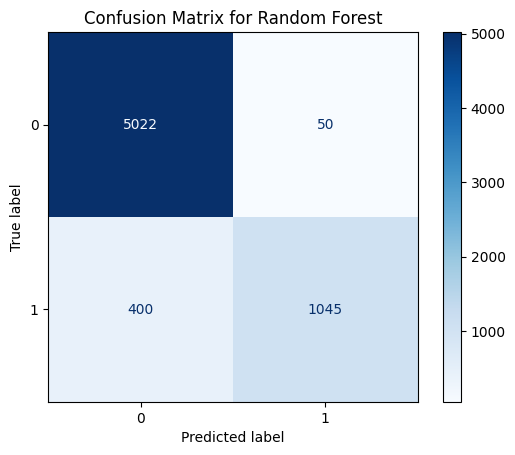

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')

# Add title and labels
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

                        Feature  Importance
5           loan_percent_income    0.222116
1                 person_income    0.149813
4                 loan_int_rate    0.121769
3                     loan_amnt    0.080086
9    person_home_ownership_RENT    0.078454
2             person_emp_length    0.059375
17                 loan_grade_D    0.053093
0                    person_age    0.048915
6    cb_person_cred_hist_length    0.038089
8     person_home_ownership_OWN    0.017760
16                 loan_grade_C    0.017256
11  loan_intent_HOMEIMPROVEMENT    0.015383
12          loan_intent_MEDICAL    0.015196
10        loan_intent_EDUCATION    0.015162
18                 loan_grade_E    0.014730
21  cb_person_default_on_file_Y    0.013842
14          loan_intent_VENTURE    0.013157
13         loan_intent_PERSONAL    0.012569
19                 loan_grade_F    0.005002
15                 loan_grade_B    0.004285
20                 loan_grade_G    0.002906
7   person_home_ownership_OTHER 

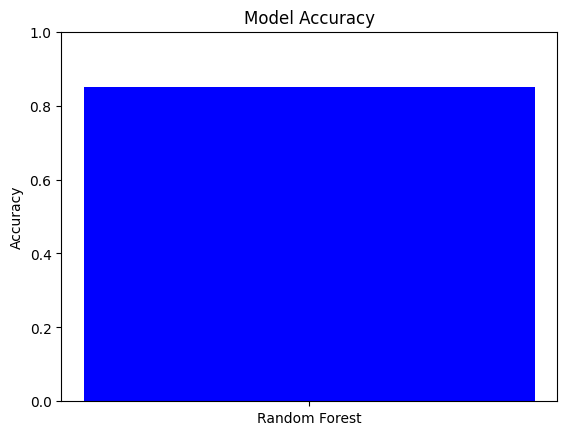

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'accuracy' contains the accuracy score from Random Forest
accuracy = 0.85  # Replace this with your calculated accuracy

# Plot
plt.bar(['Random Forest'], [accuracy], color='blue')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

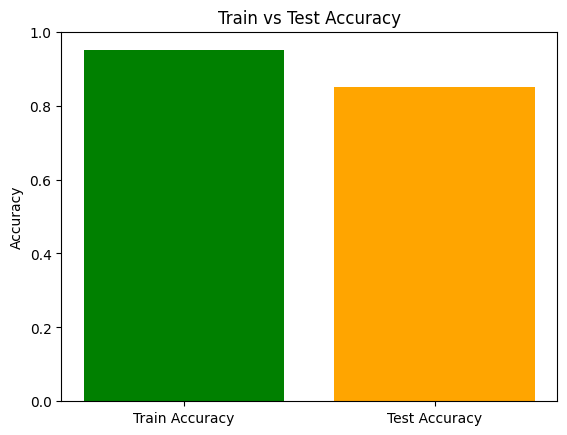

In [ ]:
# Example accuracy values
train_accuracy = 0.95  # Replace with your training accuracy
test_accuracy = 0.85   # Replace with your test accuracy

# Plot
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['green', 'orange'])
plt.ylim(0, 1)
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()


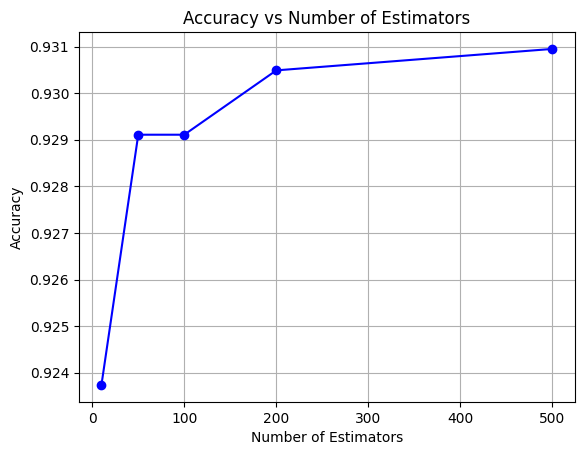

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example: Accuracy for different numbers of estimators
estimators = [10, 50, 100, 200, 500]
accuracies = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot
plt.plot(estimators, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output_df.head())

output_df.to_csv('random_forest_predictions.csv', index=False)


       Actual  Predicted
14668       0          0
24614       0          0
11096       0          0
10424       1          1
26007       1          1


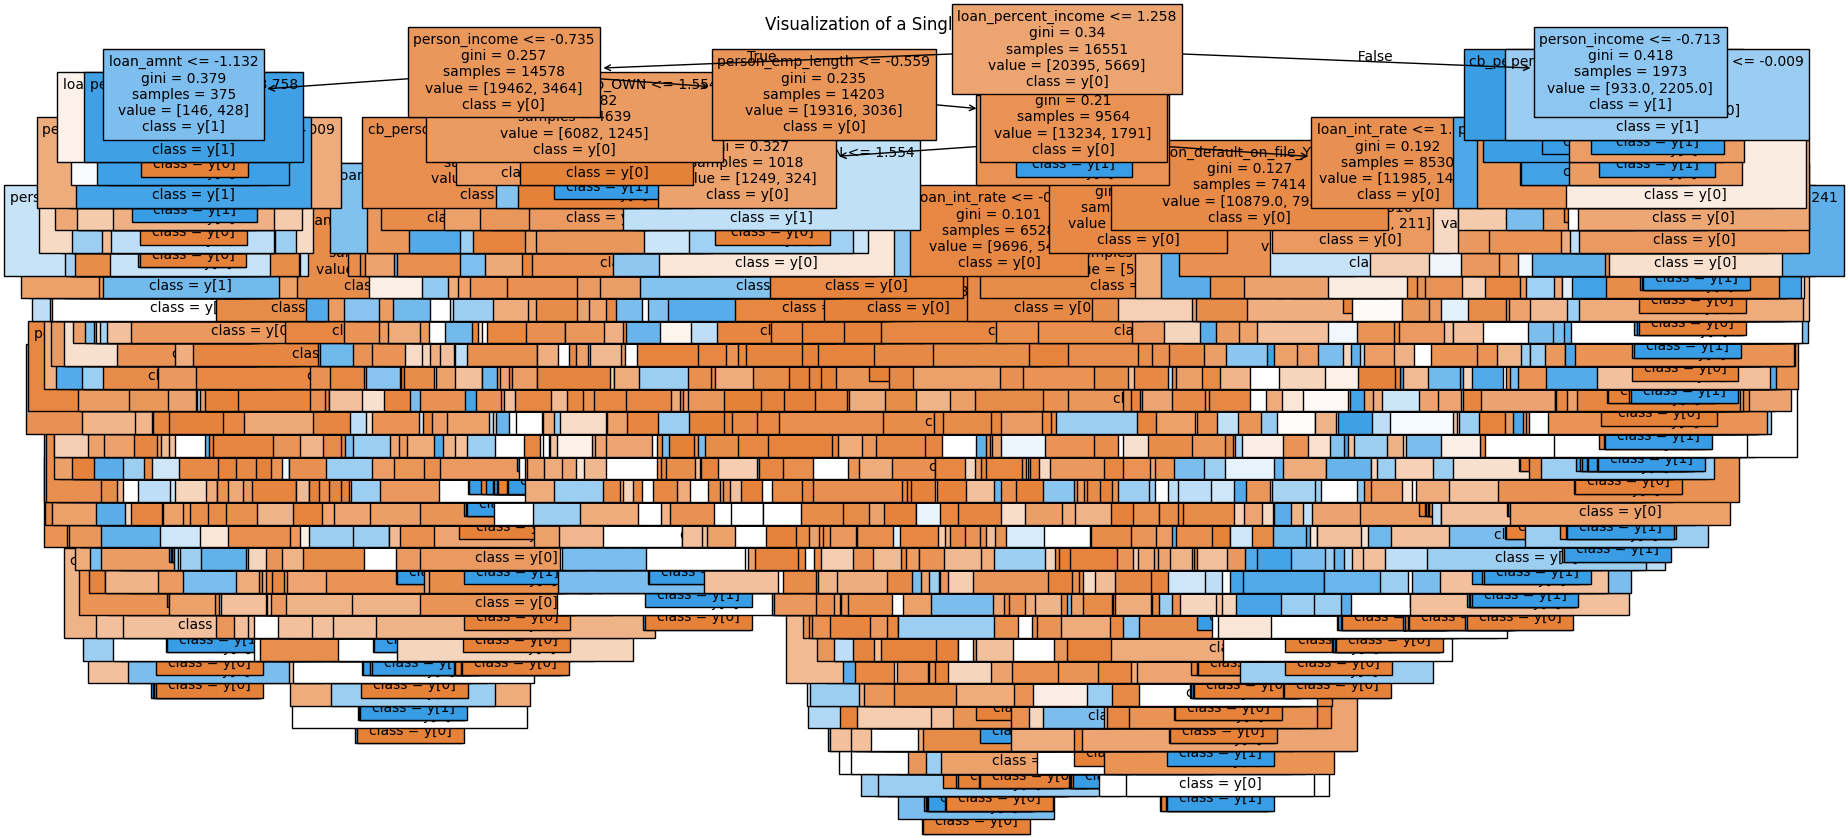

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=X.columns, class_names=True, fontsize=10)
plt.title("Visualization of a Single Decision Tree")
plt.show()


# KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('credit_risk_dataset (2).csv')

numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

categorical_cols = data.select_dtypes(exclude=['number']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

data = pd.get_dummies(data, drop_first=True)

X = data.drop('loan_status', axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      5072
           1       0.87      0.64      0.74      1445

    accuracy                           0.90      6517
   macro avg       0.89      0.81      0.84      6517
weighted avg       0.90      0.90      0.89      6517

Confusion Matrix:
[[4934  138]
 [ 521  924]]
